# Object Detection and Segmentation using `SAMYOL` library

# 🤔 Introduction

SAMYOL is a comprehensive Python library that harnesses the power of YOLO (You Only Look Once) object detection models to provide accurate bounding box predictions for various objects within an image. By leveraging this information, SAMYOL seamlessly integrates with the cutting-edge Segment Anything Model (SAM) to enable precise object segmentation, resulting in the generation of masks.

With SAMYOL, users can effortlessly detect and extract objects of interest from images, making it an indispensable tool for computer vision tasks. The library offers a user-friendly interface, allowing developers and researchers to seamlessly incorporate object detection and segmentation capabilities into their applications. By combining the strengths of YOLO models and the advanced segmentation capabilities of SAM, SAMYOL ensures robust and reliable results.

# 🚀 Getting Started

This notebook demonstrates how to use SAMYOL library to detect and segment objects in images. The library combines YOLO models (YOLOv6, YOLOv7, YOLOv8, and YOLO-NAS) and the Segment Anything Model (SAM).

If you are interested in one of these models you can check them out using the following links:

* You Only Look Once v6 (YOLOv6): 
  - Released by Meituan Vision AI Department.
  - Paper: [YOLOv6 Model](https://arxiv.org/abs/2209.02976). 
  - Original source code: [GitHub](https://github.com/meituan/YOLOv6)


* You Only Look Once v7 (YOLOv7): 
  - Paper: [YOLOv7 Model](https://arxiv.org/abs/2207.02696). 
  - Original source code: [GitHub](https://github.com/WongKinYiu/yolov7)


* You Only Look Once v8 (YOLOv8): 
  - Released by ultralytics.
  - Docs: [YOLOv8 Model](https://docs.ultralytics.com/). 
  - Original source code: [GitHub](https://github.com/ultralytics/ultralytics)


* You Only Look Once NAS (YOLO-NAS): 
  - Released by Deci's Neural Architecture Search Technology.
  - Original source code: [GitHub](https://github.com/Deci-AI/super-gradients)


* Segment Anything Model (SAM): 
  - Released by Meta AI.
  - Paper: [Segment Anything Model](https://ai.facebook.com/research/publications/segment-anything/). 
  - Original source code: [GitHub](https://github.com/facebookresearch/segment-anything)



## ⏳ Installation

SAMYOL is installed using pip. 

This python library requires python>=3.11, as well as pytorch>=1.7.0 and torchvision>=0.8.1. Installing both PyTorch and TorchVision with CUDA support is strongly recommended. We will also need the models checkpoints. These will be installed automatically if they are not already installed.

```
# Install SAMYOL:
pip install SAMYOL
# or
conda install SAMYOL -c conda-forge
# or
pip install git+https://github.com/Jawher-Ben-Abdallah/SAMYOL.git
# or clone the repository locally and install
git clone git@github.com:Jawher-Ben-Abdallah/SAMYOL.git
cd segment-anything
pip install -e .
```

In [ ]:
#!pip install SAMYOL --quiet

## 💻 Load some images

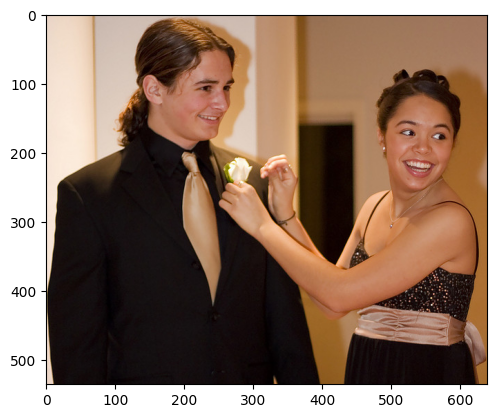

In [4]:
from samyol.utils import load_image
import matplotlib.pyplot as plt

input_paths = ["./assets/image1.jpg", "./assets/image2.jpg"]
raw_image = load_image(input_paths[0])
plt.imshow(raw_image)

In [5]:
# Set up some global variables and utility functions

from PIL import Image

def display_segmentation_masks(masks_paths):
    num_masks = len(masks_paths)

    fig, axes = plt.subplots(1, num_masks)

    for i in range(num_masks):
        mask = Image.open(masks_paths[i])

        axes[i].imshow(mask)

    plt.tight_layout()
    plt.show()


device = "cuda"
class_labels = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 
    'hair drier', 'toothbrush']

SAMYOL utilizes YOLO models to generate bounding boxes for objects within images. These bounding boxes serve as inputs for SAM, enabling accurate segmentation and mask generation. With SAMYOL, you can efficiently identify, localize, and obtain precise bounding boxes and segmentation masks for detected objects in images. Currently, SAMYOL supports YOLOv6, YOLOv7, YOLOv8, and YOLO-NAS

In [ ]:
from samyol.predictor import SAMYOL

## 🔍 Using YOLOv6 as an Object Detector

In [ ]:
# Specify the YOLO model version and path
version = "6"
model_path = "./checkpoints/yolov6-tiny.onnx"  #TODO: check model path

samyol = SAMYOL(
    model_path=model_path,
    version=version,
    device=device,
    class_labels=class_labels
)

# Generate predictions using YOLOv6 model + SAM 
samyol_predictions = samyol.predict(input_paths=input_paths)

### 🔥 Display and save results

In [ ]:
# Dsiplay the original image with the bounding boxes and the corresponding masks
img_idx = 0
samyol_predictions.display(img_idx)

In [ ]:
# Save the masks (H, W, num_masks) and SAMYOL predictions' metadata
samyol_predictions.save(
    save_dir="./", 
    filename="YOLOv6_SAM_masks", 
    fuse_masks=True, 
    save_metadata=True, 
    image_id=0, 
    format="png")

In [ ]:
#Load masks
masks_paths = ...
display_segmentation_masks(masks_paths)

## 🔍 Using YOLOv7 as an Object Detector

In [ ]:
# Specify the YOLO model version and path
version = "7"
model_path = "./checkpoints/yolov7-tiny.onnx"  #TODO: check model path

samyol = SAMYOL(
    model_path=model_path,
    version=version,
    device=device,
    class_labels=class_labels
)

# Generate predictions using YOLOv7 model + SAM 
samyol_predictions = samyol.predict(input_paths=input_paths)

### 🔥 Display and save results

In [ ]:
# Dsiplay the original image with the bounding boxes and the corresponding masks
img_idx = 0
samyol_predictions.display(img_idx)

In [ ]:
# Save the masks (H, W, num_masks) and SAMYOL predictions' metadata
samyol_predictions.save(
    save_dir="./", 
    filename="YOLOv7_SAM_masks", 
    fuse_masks=True, 
    save_metadata=True, 
    image_id=0, 
    format="png")

In [ ]:
#Load masks
masks_paths = ...
display_segmentation_masks(masks_paths)

## 🔍 Using YOLOv8 as an Object Detector

In [ ]:
# Specify the YOLO model version and path
version = "8"
model_path = "./checkpoints/yolov8s.pt"  #TODO: check model path

samyol = SAMYOL(
    model_path=model_path,
    version=version,
    device=device,
    class_labels=class_labels
)

# Generate predictions using YOLOv8 model + SAM 
samyol_predictions = samyol.predict(input_paths=input_paths)

### 🔥 Display and save results

In [ ]:
# Dsiplay the original image with the bounding boxes and the corresponding masks
img_idx = 0
samyol_predictions.display(img_idx)

In [ ]:
# Save the masks (H, W, num_masks) and SAMYOL predictions' metadata
samyol_predictions.save(
    save_dir="./", 
    filename="YOLOv8_SAM_masks", 
    fuse_masks=True, 
    save_metadata=True, 
    image_id=0, format="png")

In [ ]:
#Load masks
masks_paths = ...
display_segmentation_masks(masks_paths)

## 🔍 Using YOLO-NAS as an Object Detector

In [ ]:
# Specify the YOLO model version and path
version = "nas"
model_path = "./checkpoints/yolov7-tiny.onnx"  #TODO: check model path

samyol = SAMYOL(
    model_path=model_path,
    version=version,
    device=device,
    class_labels=class_labels
)

# Generate predictions using YOLOv-NAS model + SAM 
samyol_predictions = samyol.predict(input_paths=input_paths)

### 🔥 Display and save results

In [ ]:
# Dsiplay the original image with the bounding boxes and the corresponding masks
img_idx = 0
samyol_predictions.display(img_idx)

In [ ]:
# Save the masks (H, W, num_masks) and SAMYOL predictions' metadata
samyol_predictions.save(
    save_dir="./", 
    filename="YOLO_NAS_SAM_masks", 
    fuse_masks=True, 
    save_metadata=True, 
    image_id=0, 
    format="png")

In [ ]:
#Load masks
masks_paths = ...
display_segmentation_masks(masks_paths)